# Summary
###### Categorical data 
###### Joint plots / Histograms / Stacked Histograms
###### KDEplot / Violenplot 
###### Subplots
###### Facet Grid / Coordinates / Diagonals
###### Dashboards
###### Styling Tips / Finishing touches

---

# Categorical data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,4
import seaborn as sns

In [2]:
movies = pd.read_csv("C:/Users/admin/Downloads/MovieRatings.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [3]:
movies.columns = ['Film','Genre','CriticRatings','AudienceRatings','Budget','Year']
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movies['Film'] = movies['Film'].astype('category')
movies['Genre'] = movies['Genre'].astype('category')
movies['Year'] = movies['Year'].astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [5]:
print('unique values in Genre = ',movies['Genre'].cat.categories)

unique values in Genre =  Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')


In [6]:
movies.describe()

,CriticRatings,AudienceRatings,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

# Joint Plots
###### scatter plot - correlation - distribution
###### hex allows you to see at clusters

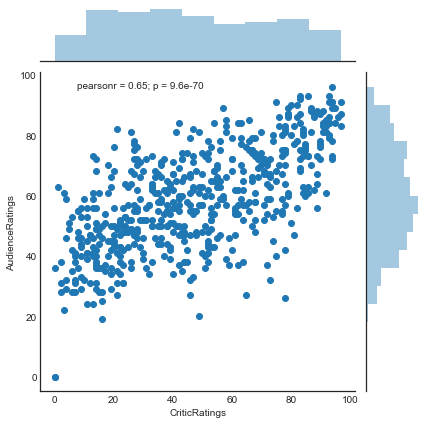

In [7]:
vis1 = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings')

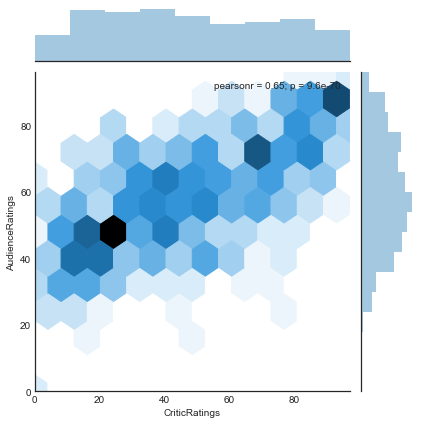

In [8]:
vis2 = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings', kind='hex')

# Histograms

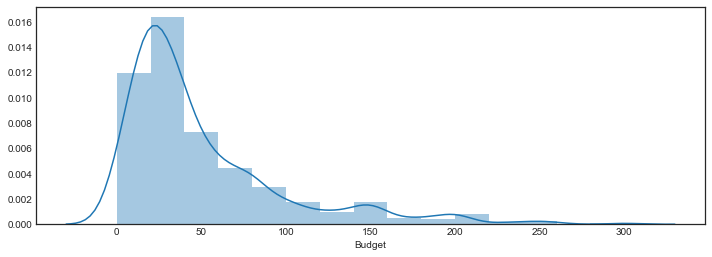

In [9]:
vis3 = sns.distplot(movies['Budget'], bins=15)

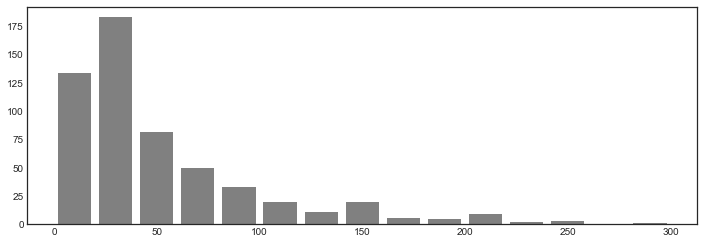

In [10]:
plt.hist(movies['Budget'], bins=15, color='Gray', rwidth=0.81)
plt.show()

# Stacked Histograms

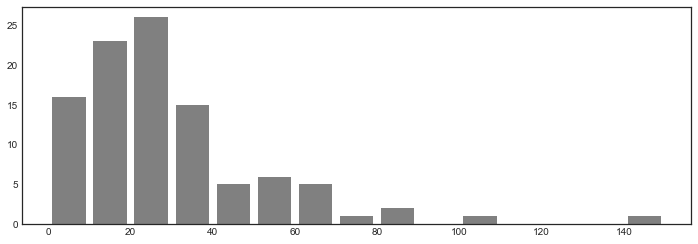

In [11]:
Drama = movies[movies['Genre'] == 'Drama']
plt.hist(Drama['Budget'], bins=15, color='Gray', rwidth=0.81)
plt.show()

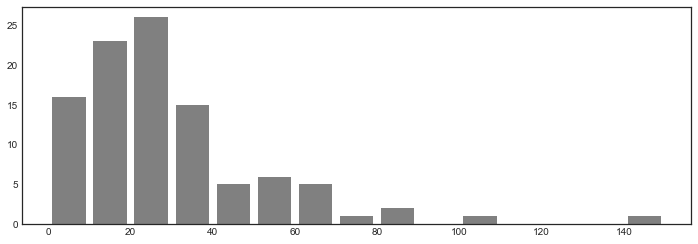

In [12]:
plt.hist(movies[movies['Genre'] == 'Drama']['Budget'], bins=15, color='Gray', rwidth=0.81)
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


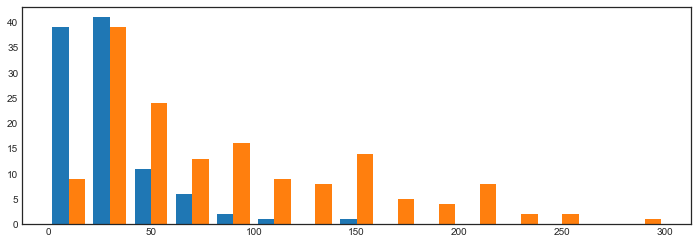

In [13]:
plt.hist([movies[movies['Genre'] == 'Drama']['Budget'],movies[movies['Genre'] == 'Action']['Budget']], bins=15)
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


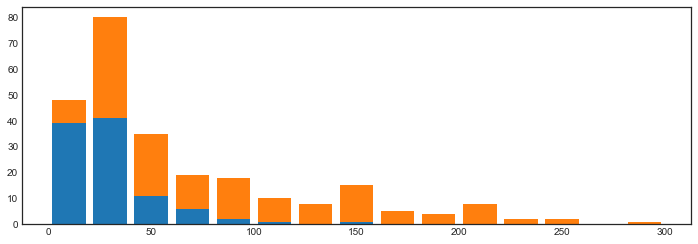

In [14]:
plt.hist([movies[movies['Genre'] == 'Drama']['Budget'],movies[movies['Genre'] == 'Action']['Budget']], 
         bins=15, stacked=True, rwidth=0.81)
plt.show()

In [15]:
mylist = []
mygenre = []
for gen in movies['Genre'].cat.categories:
    print(gen)
    mylist.append(movies[movies['Genre'] == gen]['Budget'])
    mygenre.append(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


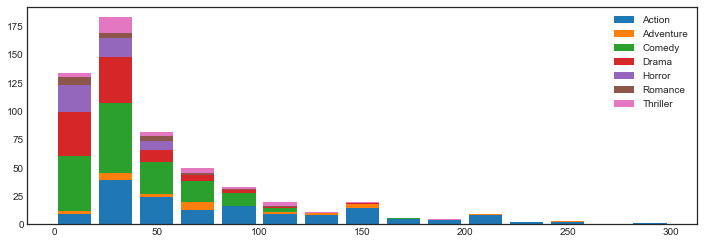

In [16]:
plt.hist(mylist, bins=15, stacked=True, rwidth=0.81, label=mygenre)
plt.legend()
plt.show()

---

# KDE Plot

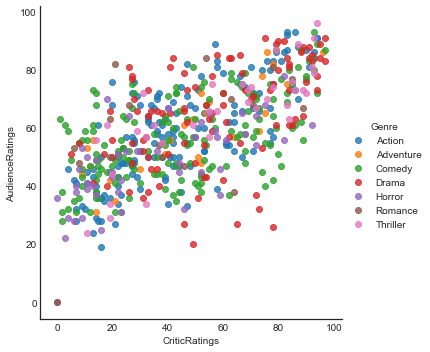

In [17]:
vis4 = sns.lmplot(data=movies, x='CriticRatings', y='AudienceRatings', fit_reg=False, hue='Genre')

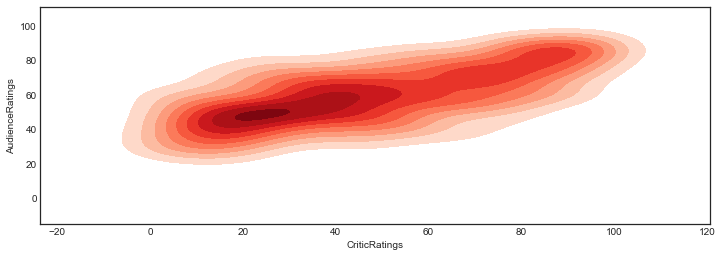

In [18]:
vis5 = sns.kdeplot(movies['CriticRatings'], movies['AudienceRatings'], shade=True, shade_lowest=False, cmap='Reds')

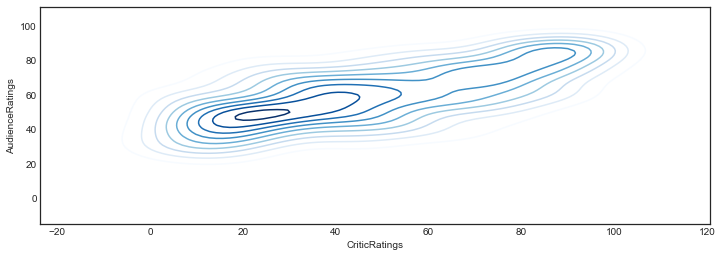

In [19]:
vis6 = sns.kdeplot(movies['CriticRatings'], movies['AudienceRatings'], cmap='Blues')

# Subplots

[(-20, 120)]

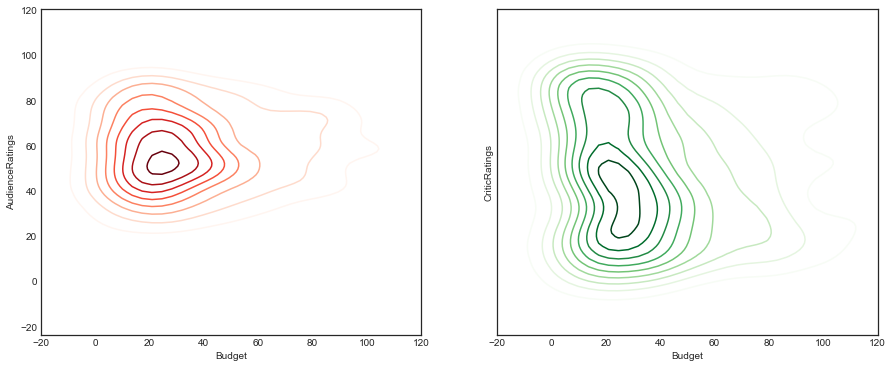

In [20]:
f,axes = plt.subplots(1,2,figsize=(15,6), sharex=True, sharey=True)
vis7 = sns.kdeplot(movies['Budget'], movies['AudienceRatings'], cmap='Reds', ax=axes[0])
vis8 = sns.kdeplot(movies['Budget'], movies['CriticRatings'], cmap='Greens', ax=axes[1])
vis7.set(xlim=(-20,120))

# Violin Plots

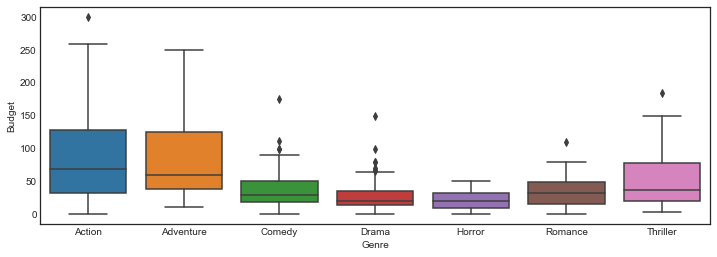

In [21]:
vis9 = sns.boxplot(movies['Genre'], movies['Budget'])

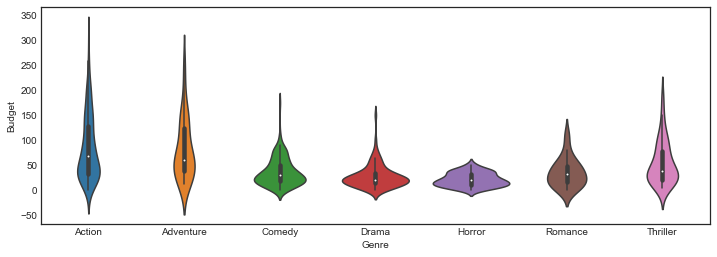

In [22]:
vis10 = sns.violinplot(movies['Genre'], movies['Budget'])

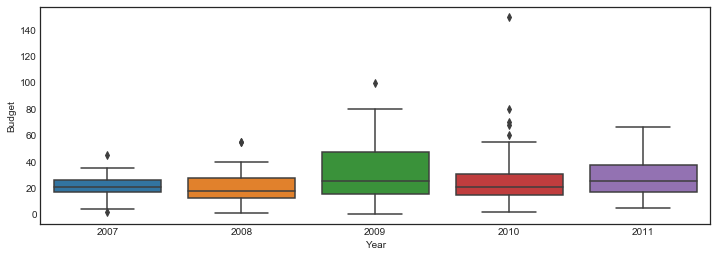

In [23]:
vis11 = sns.boxplot(data=movies[movies['Genre']=='Drama'], x='Year', y='Budget')

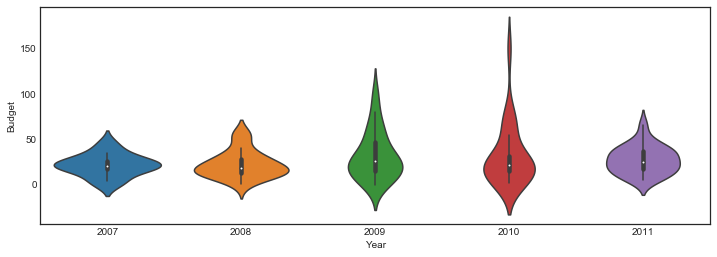

In [24]:
vis12 = sns.violinplot(data=movies[movies['Genre']=='Drama'], x='Year', y='Budget')

---

# Facet Grid
###### splits the graph

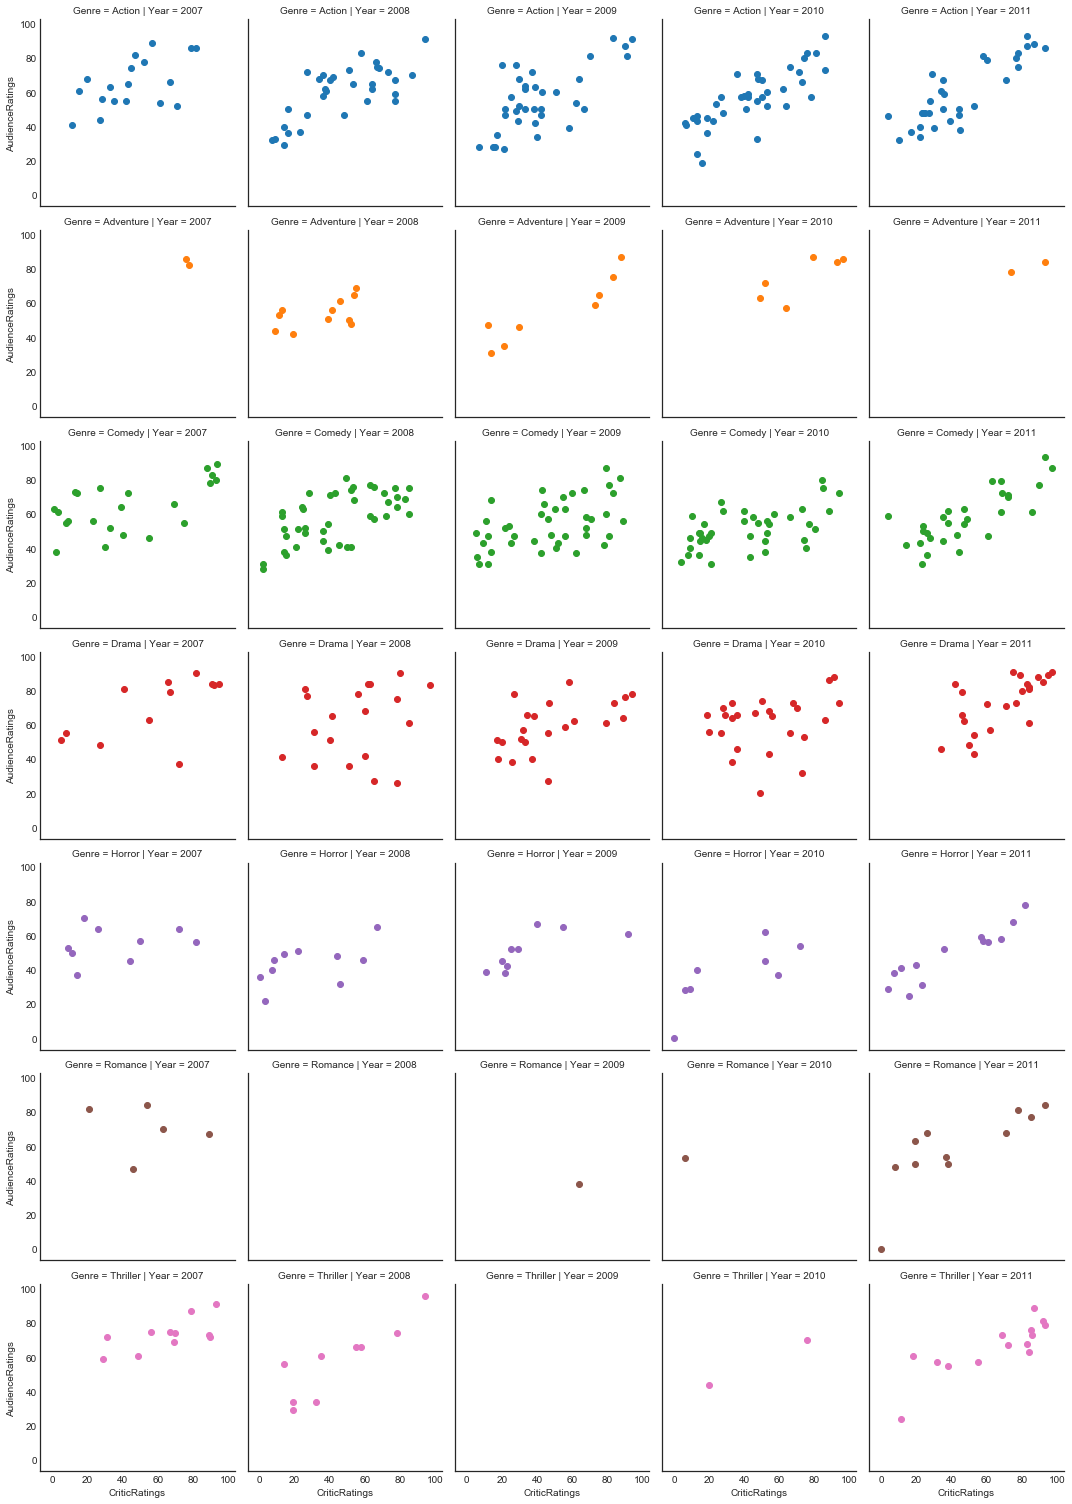

In [25]:
vis13 = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
vis13 = vis13.map(plt.scatter, 'CriticRatings', 'AudienceRatings')

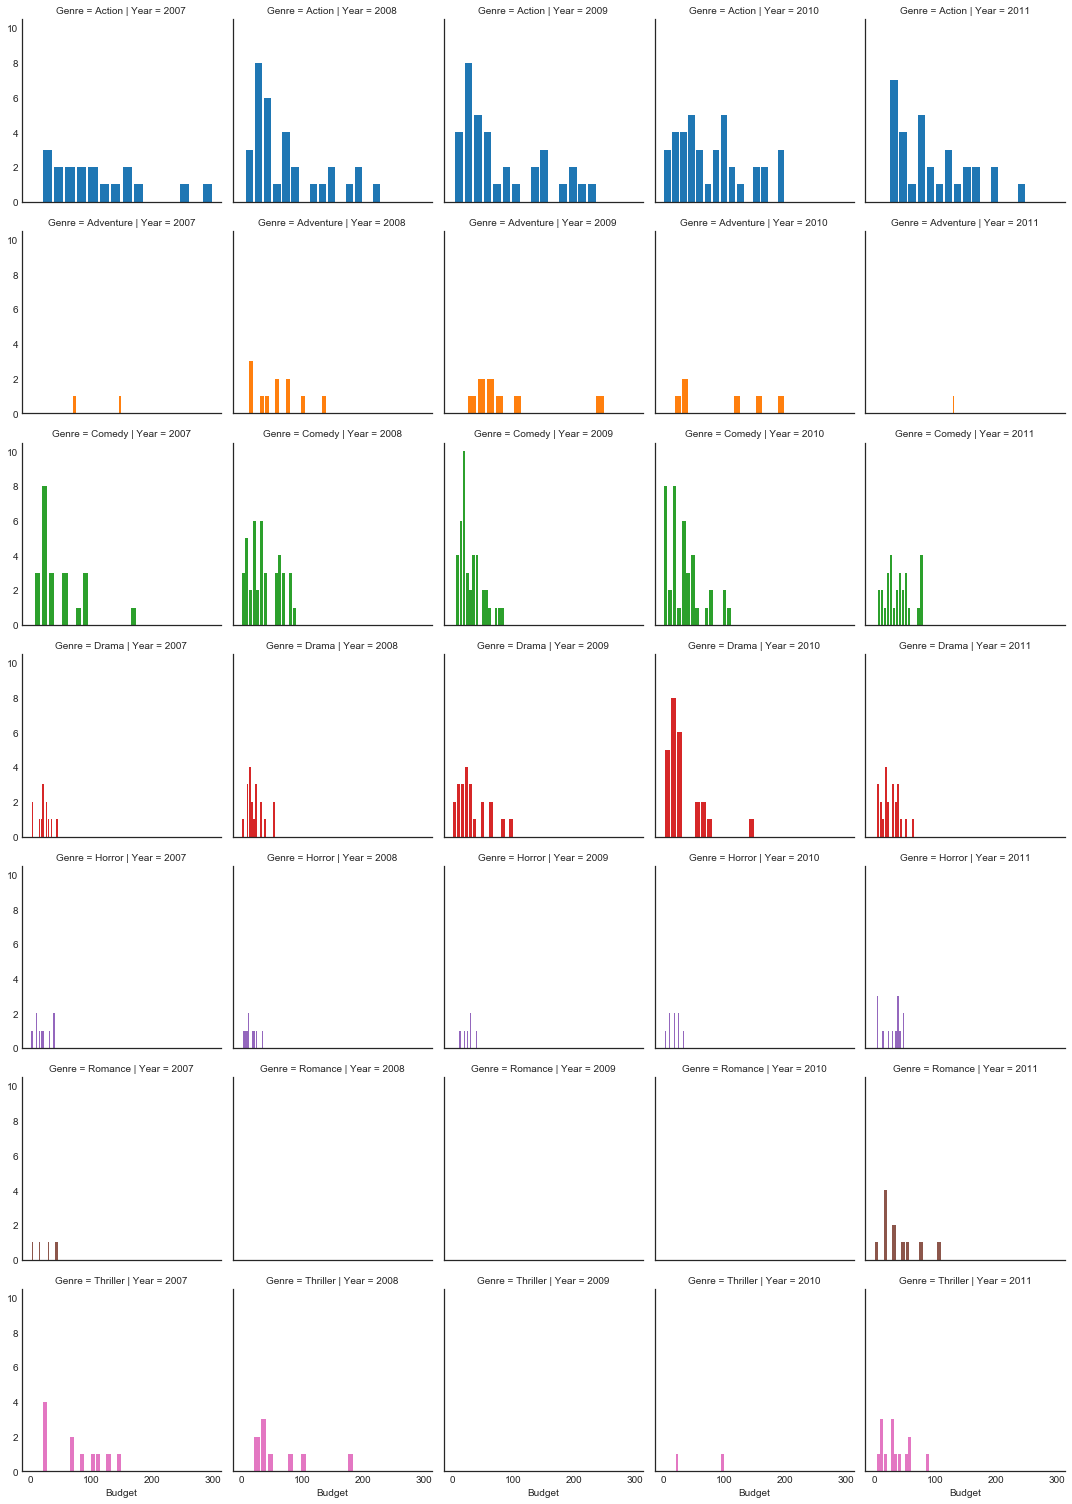

In [26]:
vis14 = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
kws = dict(bins=15, rwidth=0.81)
vis14 = vis14.map(plt.hist, 'Budget', **kws)

# Coordinates and Diagonals

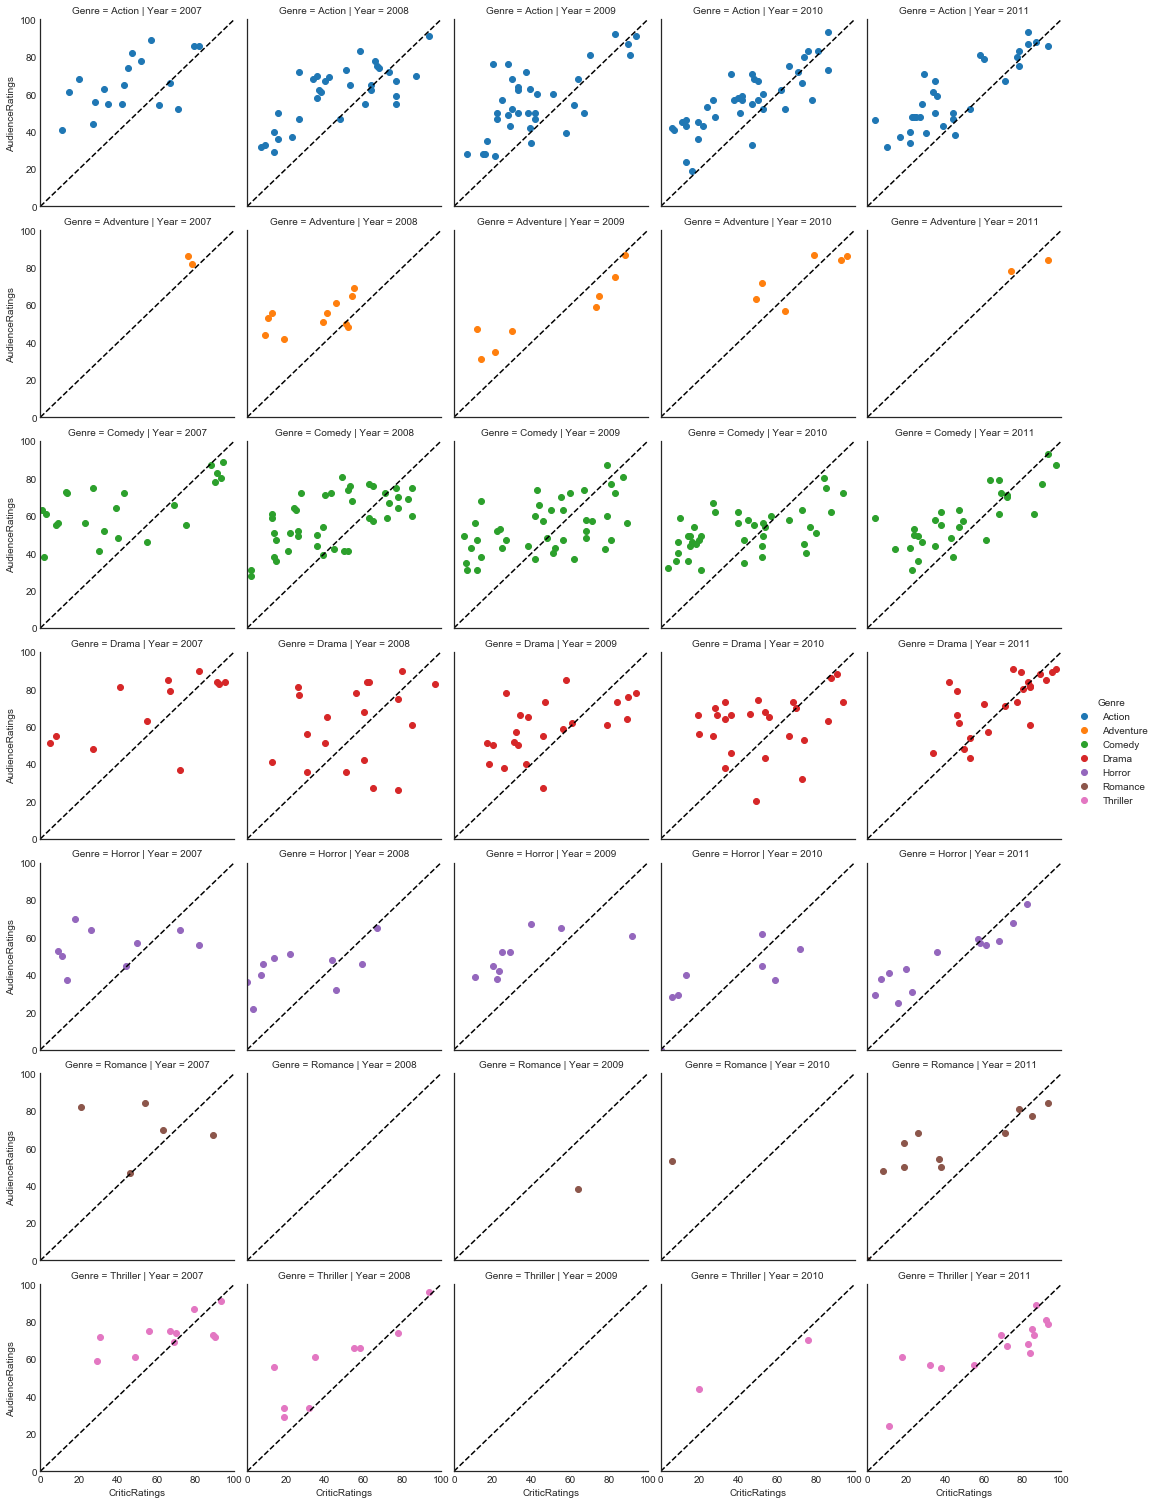

In [27]:
vis15 = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
vis15 = vis15.map(plt.scatter, 'CriticRatings', 'AudienceRatings')
vis15.set(xlim=(0,100), ylim=(0,100))
for i in vis15.axes.flat:
    i.plot((0,100), (0,100), c='black', ls='--')
vis15.add_legend()

---

# Dashboards

###### different way to show sns and plt plots

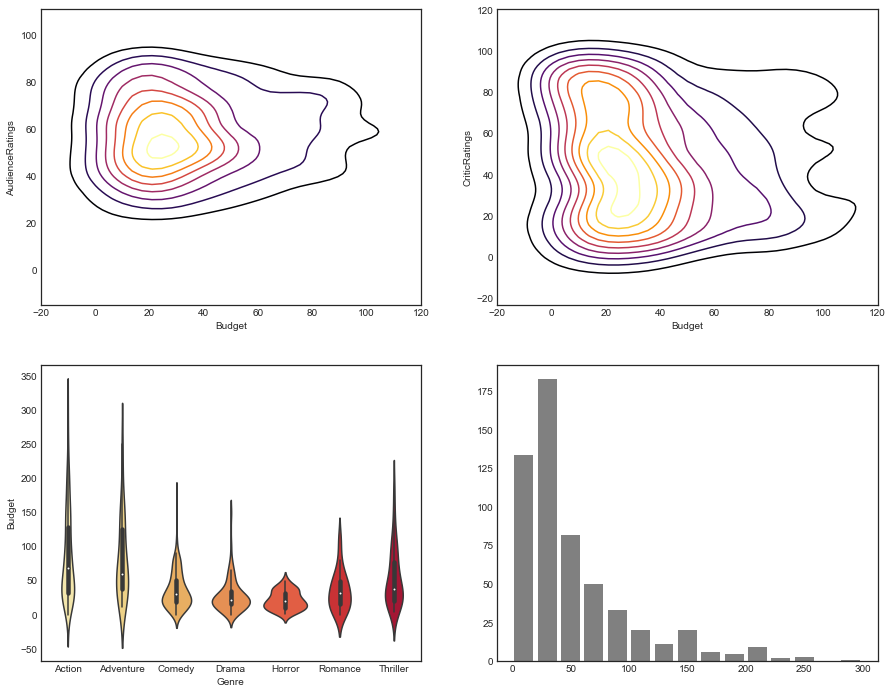

In [28]:
f,axes = plt.subplots(2,2,figsize=(15,12))
vis16 = sns.kdeplot(movies['Budget'], movies['AudienceRatings'], cmap='inferno', ax=axes[0,0])
vis17 = sns.kdeplot(movies['Budget'], movies['CriticRatings'], cmap='inferno', ax=axes[0,1])
vis18 = sns.violinplot(movies['Genre'], movies['Budget'], ax=axes[1,0], palette='YlOrRd')
vis19 = axes[1,1].hist(movies['Budget'], bins=15, color='Gray', rwidth=0.81)
vis16.set(xlim=(-20,120))
vis17.set(xlim=(-20,120))
plt.show()

# Styling tips and Finishing Touches

In [29]:
mylist = []
mygenre = []
for gen in movies['Genre'].cat.categories:
    print(gen)
    mylist.append(movies[movies['Genre'] == gen]['Budget'])
    mygenre.append(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


Before


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


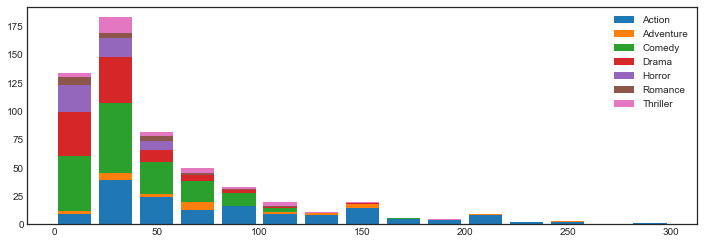

In [30]:
print("Before")
plt.hist(mylist, bins=15, stacked=True, rwidth=0.81, label=mygenre)
plt.legend()
plt.show()

After


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


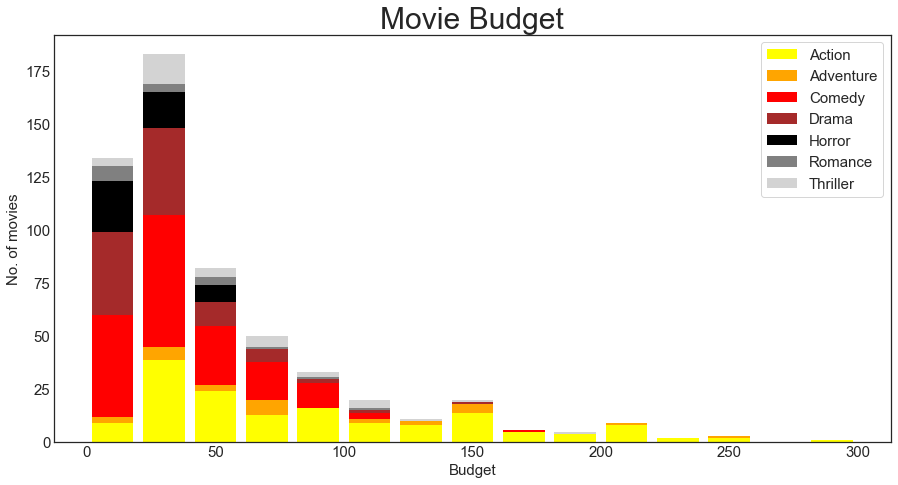

In [31]:
print("After")
f,axes = plt.subplots()
f.set_size_inches(15,7.5)
vis20 = plt.hist(mylist, bins=15, stacked=True, rwidth=0.81, label=mygenre, 
                 color=['Yellow','Orange','Red','Brown','black','grey','LightGray'])
plt.title('Movie Budget', fontsize=30)
plt.ylabel('No. of movies', fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(frameon=True, fontsize=15)
plt.show()

---

# Movie

In [32]:
data = pd.read_csv("C:/Users/admin/Downloads/Dataset.csv", encoding="latin1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

In [33]:
data['Studio'].unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company', 'UA Entertainment',
       'WB/New Line', 'New Line Cinema', 'Fox', 'TriStar',
       'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [34]:
data['Genre'].unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation', 'biography',
       'drama', 'musical', 'sci-fi', 'crime', 'romance', 'fantasy',
       'mystery', 'thriller', 'documentary'], dtype=object)

In [35]:
data1 = data[data['Studio'].isin(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB'])]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 606
Data columns (total 18 columns):
Day of Week               477 non-null object
Director                  477 non-null object
Genre                     477 non-null object
Movie Title               477 non-null object
Release Date              477 non-null object
Studio                    477 non-null object
Adjusted Gross ($mill)    477 non-null object
Budget ($mill)            477 non-null float64
Gross ($mill)             477 non-null object
IMDb Rating               477 non-null float64
MovieLens Rating          477 non-null float64
Overseas ($mill)          477 non-null object
Overseas%                 477 non-null float64
Profit ($mill)            477 non-null object
Profit%                   477 non-null float64
Runtime (min)             477 non-null int64
US ($mill)                477 non-null float64
Gross % US                477 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 70.8+ 

In [36]:
data2 = data1[data1['Genre'].isin(['action', 'adventure', 'animation', 'comedy', 'drama'])]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
Day of Week               423 non-null object
Director                  423 non-null object
Genre                     423 non-null object
Movie Title               423 non-null object
Release Date              423 non-null object
Studio                    423 non-null object
Adjusted Gross ($mill)    423 non-null object
Budget ($mill)            423 non-null float64
Gross ($mill)             423 non-null object
IMDb Rating               423 non-null float64
MovieLens Rating          423 non-null float64
Overseas ($mill)          423 non-null object
Overseas%                 423 non-null float64
Profit ($mill)            423 non-null object
Profit%                   423 non-null float64
Runtime (min)             423 non-null int64
US ($mill)                423 non-null float64
Gross % US                423 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 62.8+ 

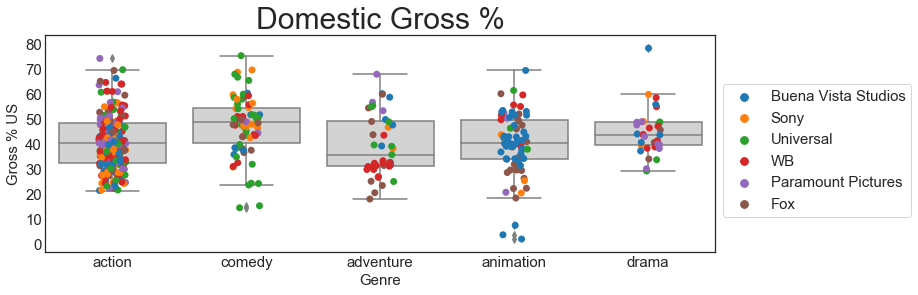

In [37]:
vis21 = sns.boxplot(data2['Genre'], data2['Gross % US'], color='LightGray')
vis22 = sns.stripplot(data2['Genre'], data2['Gross % US'], jitter=True, size=7, hue=data2['Studio'])
plt.title('Domestic Gross %', fontsize=30)
plt.ylabel('Gross % US', fontsize=15)
plt.xlabel('Genre', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(frameon=True, fontsize=15, bbox_to_anchor=(1,0.81))
plt.show()